# **Hotel Booking Demand Analysis**  
---
> **Context**

* Project Summary
* Situation Introduction
  - Process 1
  - Process 2
  - Process 3

## **Project Summary**
---

> **Project Title**

```
▶ Hotel Booking Demand Analysis
```  

> **Project Type**

```
▶ Data EDA & Insight Extraction
Data Source: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

## **Project Introduction**
---

> **Scenario** 

```
Hotel A has been struggling due to increasing number of cancellations and no-shows. While cancellations are somewhat manageable, no-shows result in a complete loss of the room for the night, significantly impacting operational costs. To address this, the hotel aims to predict cancellations and no-shows in advance and adjust operating costs accordingly.
```  

> **Problem Definition**

```
▶ Declining operating profit due to increased cancellations and no-shows
```  

> **Expected Outcome**

```
▶ Reduce financial losses from cancellations and no-shows, and increase operating profit
```

> **Proposed Solution**

```
▶ Use a predictive model to identify potential cancellations and no-shows, and adjust operational costs accordingly
```

> **Performance Metric**  

```
▶ Compare financial losses before and after implementing the predictive model for managing cancellations and no-shows
```

> **Operations**  

```
▶ Create a data mart as input for the model  
▶ Use the predictive model to identify likely cancellations and no-shows  
▶ For rooms with a high risk of no-show, prepare backup reservations to minimize revenue loss

```

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import matplotlib.pyplot as plt

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    IMAGES_PATH = os.path.join("images")
    os.makedirs(IMAGES_PATH, exist_ok=True)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
import pandas as pd
df = pd.read_csv('reservation.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## **Process 1**  
- **Monthly booking demand analysis**  
---

### Data Preprocessing  
---
* Review the basic characteristics of the collected dataset: 

  (1) Check data shape

  (2) Verify data type

  (3) Identify missing values

  (4) Detect outliers

In [4]:
print('df', df.shape)
print(df.info())

df (119390, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  

In [5]:
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
df['children'].fillna(0, inplace=True)
df['country'].fillna('none', inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

In [8]:
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [9]:
# delete negative values
df=df[df['adr']>0]

In [10]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.00000,117430.000000,117430.000000,117430.000000,117430.000000
mean,0.374785,105.084340,2016.160274,27.136779,15.802819,0.936422,2.521221,1.860632,0.104505,0.007869,0.027872,0.086954,0.125334,0.216486,75.177348,10.54716,2.337937,103.530818,0.062642,0.571038
std,0.484069,106.907012,0.706565,13.575680,8.783582,0.995760,1.893742,0.482102,0.399690,0.097168,0.164607,0.848690,1.446204,0.633188,107.235820,53.54574,17.677053,49.198721,0.245565,0.791655
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.260000,0.000000,0.000000
25%,0.000000,19.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.00000,0.000000,70.530000,0.000000,0.000000
50%,0.000000,71.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.00000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,162.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000,0.00000,0.000000,126.000000,0.000000,1.000000
max,1.000000,709.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,4.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.00000,391.000000,5400.000000,8.000000,5.000000


### room booking demand  
---

In [11]:
# yearly
print(df['arrival_date_year'].value_counts())
# monthly
print(df['arrival_date_month'].value_counts())

arrival_date_year
2016    55789
2017    40231
2015    21410
Name: count, dtype: int64
arrival_date_month
August       13711
July         12491
May          11611
April        10953
October      10929
June         10819
September    10351
March         9641
February      7921
November      6641
December      6561
January       5801
Name: count, dtype: int64


In [12]:
df_reservation = pd.DataFrame(df.groupby(['arrival_date_year', 'arrival_date_month'], as_index=False)['hotel'].count())
df_reservation.head(10)

,arrival_date_year,arrival_date_month,hotel
0,2015,August,3794
1,2015,December,2795
2,2015,July,2714
3,2015,November,2274
4,2015,October,4824
5,2015,September,5009
6,2016,April,5346
7,2016,August,5020
8,2016,December,3766
9,2016,February,3820


In [13]:
df_reservation = df_reservation.replace({'January' : '01.January',
                                         'February' : '02.February',
                                         'March' : '03.March',
                                         'April' : '04.April',
                                         'May' : '05.May',
                                         'June' : '06.June',
                                         'July' : '07.July',
                                         'August' : '08.August',
                                         'September' : '09.September',
                                         'October' : '10.October',
                                         'November' : '11.November',
                                         'December' : '12.December'})
df_reservation.head(5)

,arrival_date_year,arrival_date_month,hotel
0,2015,08.August,3794
1,2015,12.December,2795
2,2015,07.July,2714
3,2015,11.November,2274
4,2015,10.October,4824


In [14]:
# month data distribution check
df_reservation = df_reservation.sort_values(by=['arrival_date_year','arrival_date_month'])
df_reservation

,arrival_date_year,arrival_date_month,hotel
2,2015,07.July,2714
0,2015,08.August,3794
5,2015,09.September,5009
4,2015,10.October,4824
3,2015,11.November,2274
1,2015,12.December,2795
10,2016,01.January,2183
9,2016,02.February,3820
13,2016,03.March,4739
6,2016,04.April,5346


Saving figure monthly_booking_demand


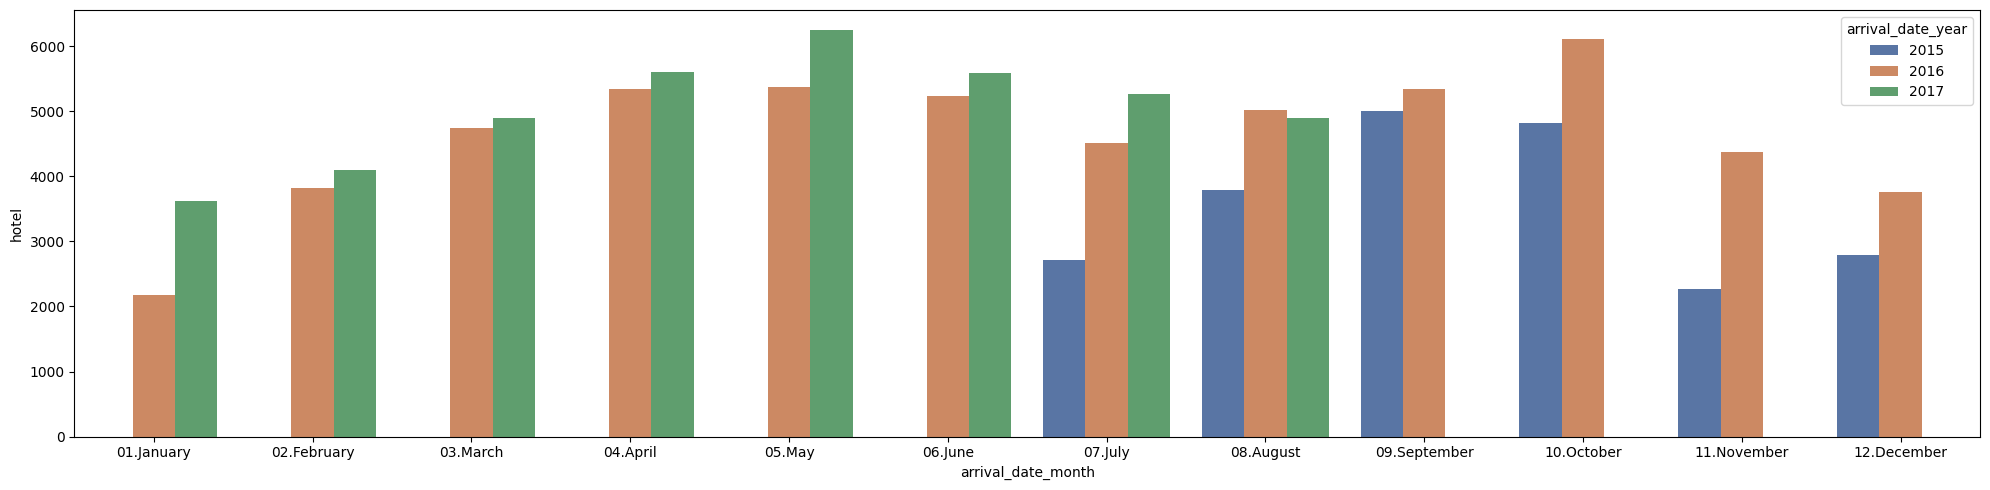

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='arrival_date_month', y='hotel', hue='arrival_date_year', data = df_reservation,
            order = ['01.January', '02.February', '03.March', '04.April', '05.May', '06.June', '07.July', '08.August', '09.September', '10.October', '11.November', '12.December'],
           palette='deep')
plt.gcf().set_size_inches(20, 5)
save_fig("monthly_booking_demand")
plt.show()

## **Process 2**  
- **cancel, no-show customers analysis**  
---

### cancelation & no-show rate
---



In [16]:
df['reservation_status'].value_counts()

reservation_status
Check-Out    73419
Canceled     42830
No-Show       1181
Name: count, dtype: int64

In [17]:
# cancelation rate
print('Canceled :', 42830 / (73419 + 42830 + 1181))
# no-show rate
print('No-Show :', 1181 / (73419 + 42830 + 1181))

Canceled : 0.36472792301796814
No-Show : 0.010057055266967554


In [18]:
# convert data into 1, 0
import numpy as np
df['reservation_status'] = np.where(df['reservation_status'] != 'Check-Out', 1, 0)
df['reservation_status'].value_counts()

reservation_status
0    73419
1    44011
Name: count, dtype: int64

In [19]:
44011 / (73419 +44011)

0.37478497828493573

### cancel/no-show customer feature analysis 
---

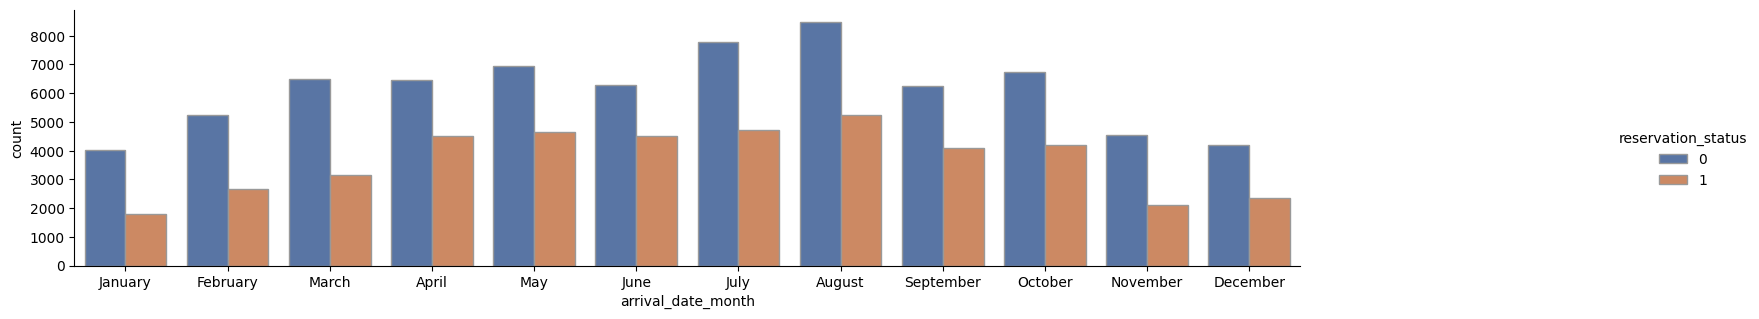

In [20]:
# monthly
sns.catplot(x="arrival_date_month", hue="reservation_status", kind="count",palette="deep", edgecolor=".6",data=df,
            order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']);
plt.gcf().set_size_inches(20, 3)

In [21]:
# monthly cancel / no-show rate comparison
df_gp = df.groupby('arrival_date_month')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
arrival_date_month,,,
June,10819,4523,41.8
April,10953,4504,41.1
May,11611,4659,40.1
September,10351,4092,39.5
October,10929,4209,38.5
August,13711,5228,38.1
July,12491,4723,37.8
December,6561,2355,35.9
February,7921,2676,33.8


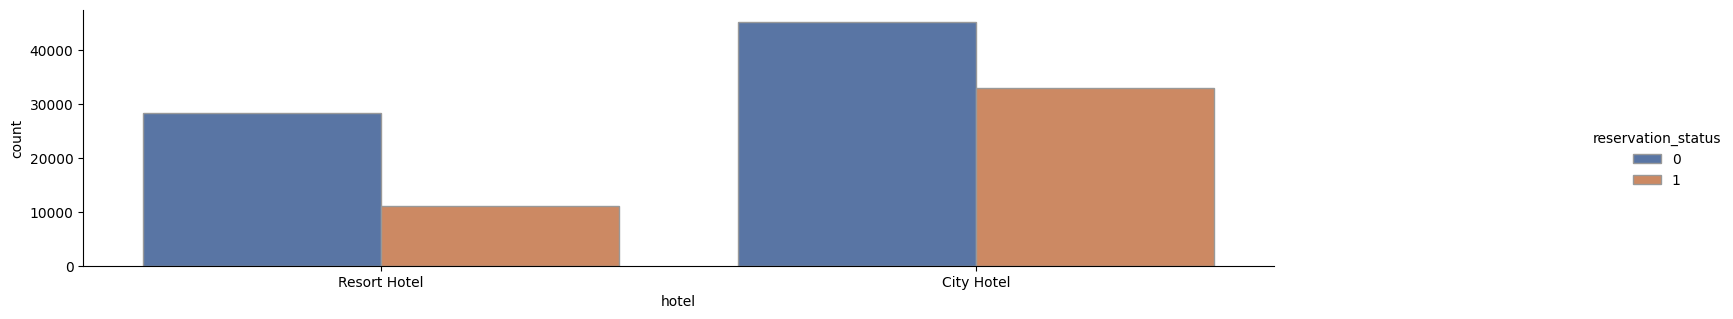

In [22]:
# resort hotel vs city hotel
sns.catplot(x="hotel", hue="reservation_status", kind="count",palette="deep", edgecolor=".6",data=df);
plt.gcf().set_size_inches(20, 3)

In [23]:
df_gp = df.groupby('hotel')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
hotel,,,
City Hotel,78122,32973,42.2
Resort Hotel,39308,11038,28.1


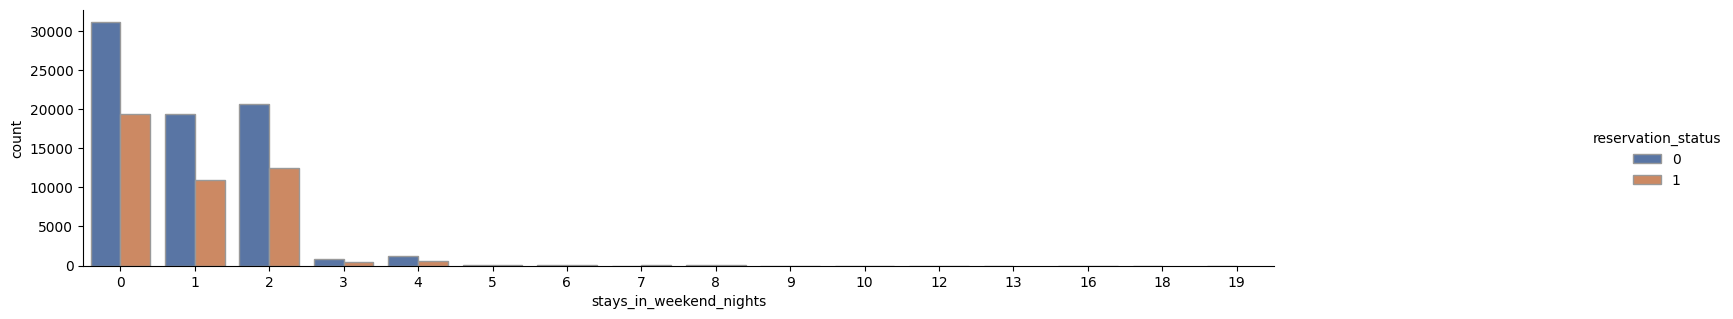

In [24]:
# compare by weekend booking days
sns.catplot(x="stays_in_weekend_nights", hue="reservation_status", kind="count",palette="deep", edgecolor=".6",data=df);
plt.gcf().set_size_inches(20, 3)

In [25]:
df_gp = df.groupby('stays_in_weekend_nights')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
stays_in_weekend_nights,,,
9,9,7,77.8
7,19,14,73.7
8,57,34,59.6
6,152,87,57.2
5,77,43,55.8
0,50499,19361,38.3
2,33150,12453,37.6
1,30361,10967,36.1
3,1244,444,35.7


In [26]:
# re-binning
df_c = df.copy()

df_c['gp'] = np.where(df_c['stays_in_weekend_nights'] <= 2, 1,
                      np.where(df_c['stays_in_weekend_nights'] <= 8, 2, 3))

df_gp = df_c.groupby('gp')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
gp,,,
3,27,11,40.7
1,114010,42781,37.5
2,3393,1219,35.9


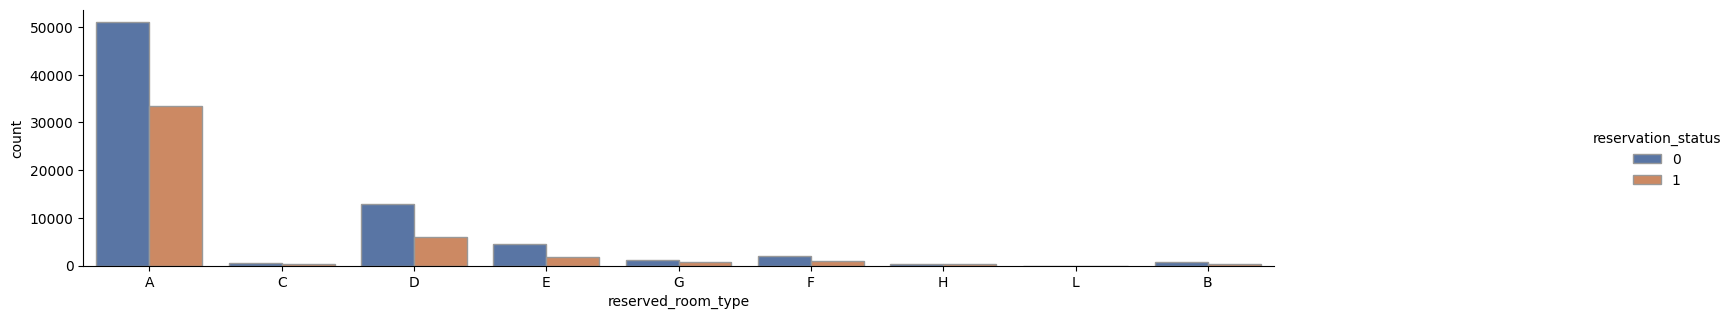

In [27]:
# compare by reserved room type
sns.catplot(x="reserved_room_type", hue="reservation_status", kind="count",palette="deep", edgecolor=".6",data=df);
plt.gcf().set_size_inches(20, 3)

In [28]:
df_gp = df.groupby('reserved_room_type')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
reserved_room_type,,,
H,595,245,41.2
A,84573,33477,39.6
G,2006,756,37.7
B,1085,365,33.6
C,913,306,33.5
L,6,2,33.3
D,19005,6086,32.0
F,2824,873,30.9
E,6423,1901,29.6


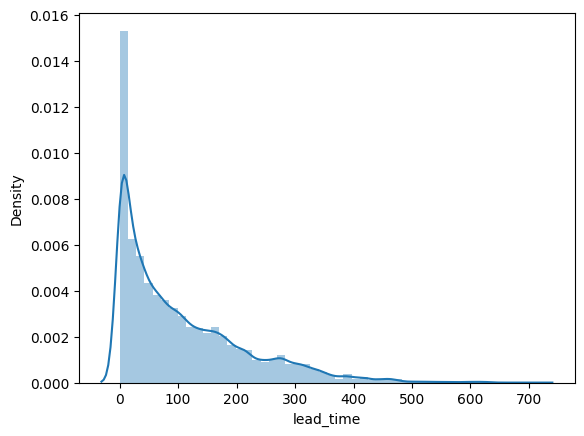

In [29]:
# lead_time
sns.distplot(df['lead_time'])
plt.show()

In [30]:
# lead time segmentation
df_c = df.copy()
df_c['gp'] = np.where(df['lead_time'] <= 100, 1,
                       np.where(df['lead_time']<=200, 2, 3))

df_gp = df_c.groupby('gp')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
gp,,,
3,20526,12182,59.3
2,26586,11987,45.1
1,70318,19842,28.2


## **Process 3**  
- **cancel/no-show customers forecast model with ML**  
---

In [31]:
# ▶ numeric, categorical value 
numeric_list=[]
categoical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categoical_list.append(i)
  else :
    numeric_list.append(i)

print("categoical_list :", categoical_list)
print("numeric_list :", numeric_list)

categoical_list : ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status_date']
numeric_list : ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status']


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['is_canceled', 'reservation_status_date', 'reservation_status'], axis=1)
Y=df['reservation_status']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(82201, 29)
(82201,)
(35229, 29)
(35229,)


In [33]:
categoical_list.remove('reservation_status_date')

In [34]:
from sklearn.preprocessing import LabelEncoder

for col in categoical_list:
    print(col)
    le = LabelEncoder()
    le.fit(list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

hotel
arrival_date_month
meal
country
market_segment
distribution_channel
reserved_room_type
assigned_room_type
deposit_type
customer_type


In [35]:
x_test[categoical_list].head(5)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
1838,1,11,0,135,6,3,0,0,0,2
94833,0,1,3,81,6,3,0,1,0,2
39282,1,1,0,59,3,1,5,5,0,2
65760,0,0,3,76,6,3,0,0,0,2
118380,0,1,0,15,3,1,0,0,0,2


### Model Training & Evaluation
---

In [36]:
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(random_state = 123456, max_depth=6)
rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85     51393
           1       0.97      0.43      0.60     30808

    accuracy                           0.78     82201
   macro avg       0.85      0.71      0.72     82201
weighted avg       0.83      0.78      0.76     82201

              precision    recall  f1-score   support

           0       0.75      0.99      0.85     22026
           1       0.96      0.44      0.60     13203

    accuracy                           0.78     35229
   macro avg       0.85      0.71      0.73     35229
weighted avg       0.83      0.78      0.76     35229



In [37]:
pd.Series(y_pred_test).value_counts()

0    29245
1     5984
Name: count, dtype: int64

In [38]:
from sklearn.metrics import roc_auc_score

y_pred_train_proba = rfc.predict_proba(x_train)[:, 1]
y_pred_test_proba = rfc.predict_proba(x_test)[:, 1]


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.9102194675984309
roc_score_test : 0.9097031147678858


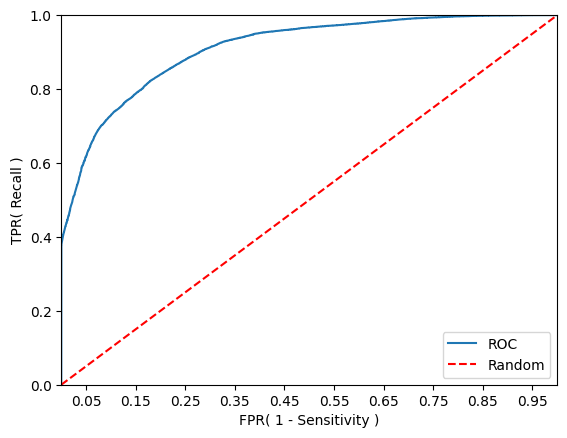

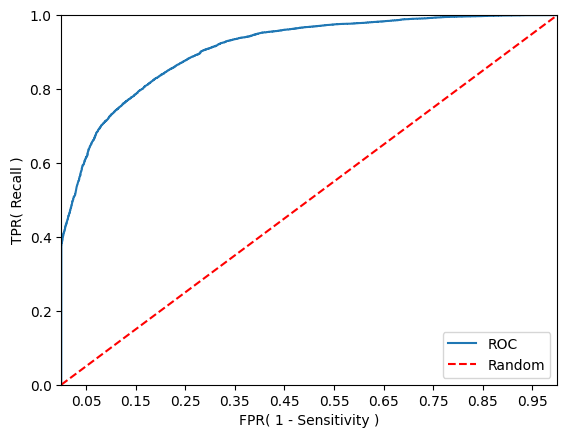

In [39]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    # FPR & TPR
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve plot
    plt.plot(fprs , tprs, label='ROC')
    # random plot
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_train, y_pred_train_proba)
roc_curve_plot(y_test, y_pred_test_proba)

### Important Feature
---


Saving figure feature_importance


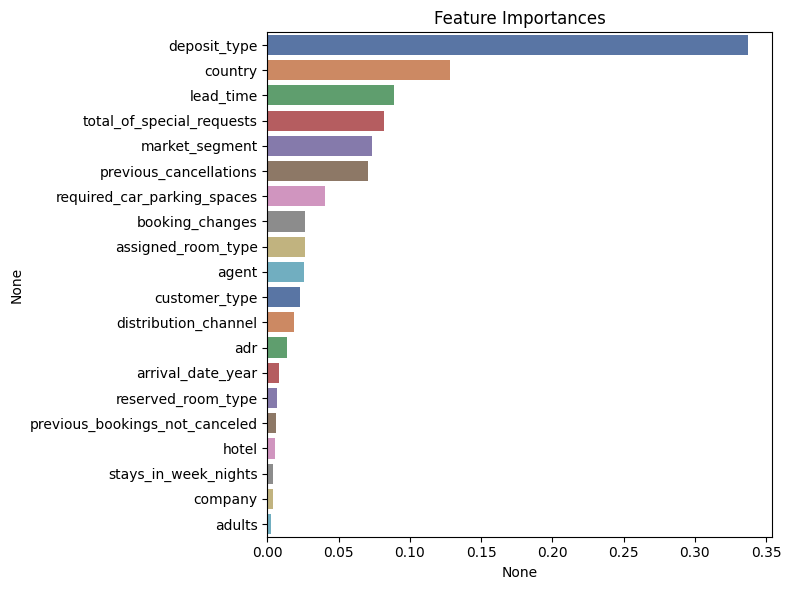

In [40]:
ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index, palette='deep')
save_fig("feature_importance")
plt.show()

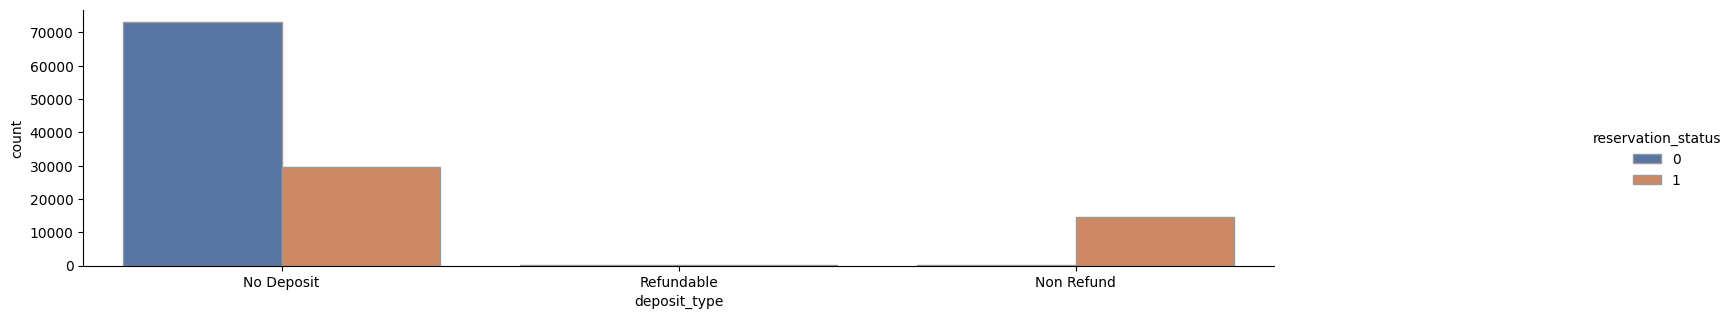

In [41]:
# top variable
sns.catplot(x="deposit_type", hue="reservation_status", kind="count",palette="deep", edgecolor=".6",data=df);
plt.gcf().set_size_inches(20, 3)

In [42]:
df_gp = df.groupby('deposit_type')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
deposit_type,,,
Non Refund,14587,14494,99.4
No Deposit,102681,29481,28.7
Refundable,162,36,22.2


In [43]:
# Country
df_gp = df.groupby('country')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp[df_gp['count'] > 2000]

,count,sum,ratio
country,,,
PRT,47040,27332,58.1
BRA,2211,829,37.5
ITA,3749,1332,35.5
ESP,8489,2176,25.6
IRL,3369,832,24.7
USA,2086,500,24.0
GBR,12055,2451,20.3
BEL,2334,472,20.2
FRA,10360,1932,18.6


In [44]:
# total_of_special_requests
df_gp = df.groupby('total_of_special_requests')['reservation_status'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp = df_gp.sort_values(by=['ratio'], ascending=False)
df_gp

,count,sum,ratio
total_of_special_requests,,,
0,69140,33404,48.3
2,12763,2849,22.3
1,32727,7279,22.2
3,2436,442,18.1
4,324,35,10.8
5,40,2,5.0



### Save and Read Model
---

In [45]:
import pickle
saved_model = pickle.dumps(rfc)
clf_from_pickle = pickle.loads(saved_model)